In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing 
from sklearn.preprocessing import OneHotEncoder

### Data Understanding

In [44]:
df = pd.read_csv('car_price_data.csv')

In [45]:
df.head()

,Unnamed: 0,Links,Marka,Model,Year,Color,Engine,Fuel_type,Mileage,Gear_box,New,Price
0,0,https://turbo.az/autos/8989100-bmw-x5,BMW,X5,2015,Göy,2.0,Mühərrik2.0 L / 313 a.g. / Plug-in Hibrid,121 000 km,Avtomat,Xeyr,28 000 USD
1,1,https://turbo.az/autos/9000361-volkswagen-tran...,Volkswagen,Transporter,2018,Qara,2.0,Mühərrik2.0 L / 140 a.g. / Dizel,60 000 km,Avtomat,Xeyr,30 700 USD
2,2,https://turbo.az/autos/9066249-honda-accord,Honda,Accord,2021,Yaş Asfalt,2.0,Mühərrik2.0 L / 212 a.g. / Hibrid,52 000 km,Variator,Xeyr,22 650 USD
3,3,https://turbo.az/autos/9089754-mercedes-c-230,Mercedes,C 230,1999,Qızılı,2.3,Mühərrik2.3 L / 150 a.g. / Benzin,284 000 km,Avtomat,Xeyr,12 450 AZN
4,4,https://turbo.az/autos/9051723-land-rover-rang...,Land Rover,Range Rover,2024,Qara,3.0,Mühərrik3.0 L / 460 a.g. / Plug-in Hibrid,0 km,Avtomat,Bəli,241 300 USD


In [46]:
df.shape

(9960, 12)

In [47]:
df.isnull().sum()

Unnamed: 0    0
Links         0
Marka         0
Model         0
Year          0
Color         0
Engine        0
Fuel_type     0
Mileage       0
Gear_box      0
New           0
Price         0
dtype: int64

### Data Preprocessing

In [48]:
df_new = df.drop(['Unnamed: 0', 'Links'], axis = 1)
mileage_list = list(df_new['Mileage'])
mileage_list = [re.sub(r'\s','', i) for i in mileage_list]
mileage_list = [re.findall(r'\d+', i) for i in mileage_list]
mileage_pd = pd.DataFrame(mileage_list).fillna(0)
mileage_pd = mileage_pd.astype('int32')
df_new['Mileage'] = mileage_pd
price_list = list(df_new['Price'])
price_list = [re.sub(r'\s','', i) for i in price_list]
currency = [re.findall(r'\D+', i)[0] for i in price_list]
price_list = [re.findall(r'\d+', i) for i in price_list]
price_pd = pd.DataFrame(price_list).fillna(0)
price_pd = price_pd.astype('int32')
df_new['Price'] = price_pd
df_new['Currency'] = currency
fuel_list = list(df_new['Fuel_type'])
fuel_list = [re.findall(r'[A-Z]\w+', i) for i in fuel_list[25:]]
fuel_list = list(df_new['Fuel_type'])
fuel_list = [re.findall(r'[A-Z]\D+', i) for i in fuel_list]
fuel_pd = pd.DataFrame(fuel_list)
fuel_pd.drop(columns=[0,1],axis = 1, inplace = True)
df_new['Fuel_type'] = fuel_pd
# df_new['New'] = df_new['New'].replace({'Bəli': 0, 'Xeyr': 1})

In [49]:
df_new['Currency'].unique()

array(['USD', 'AZN', 'EUR'], dtype=object)

In [50]:
azn = 0.59
eu = 1.05
df_new.loc[df_new['Currency'] == 'AZN', 'Price'] *= azn
df_new.loc[df_new['Currency'] == 'EUR', 'Price'] *= eu
df_new.drop(['Currency'], axis = 1,inplace = True)

In [51]:
df_new['Color'].unique()

array(['Göy', 'Qara', 'Yaş Asfalt', 'Qızılı', 'Yaşıl', 'Ağ',
       'Tünd qırmızı', 'Qəhvəyi', 'Qırmızı', 'Açıq yaşıl', 'Gümüşü',
       'Boz', 'Narıncı', 'Sarı', 'Mavi', 'Bej', 'Bənövşəyi'], dtype=object)

In [52]:
df_new

,Marka,Model,Year,Color,Engine,Fuel_type,Mileage,Gear_box,New,Price
0,BMW,X5,2015,Göy,2.0,Plug-in Hibrid,121000,Avtomat,Xeyr,28000.0
1,Volkswagen,Transporter,2018,Qara,2.0,Dizel,60000,Avtomat,Xeyr,30700.0
2,Honda,Accord,2021,Yaş Asfalt,2.0,Hibrid,52000,Variator,Xeyr,22650.0
3,Mercedes,C 230,1999,Qızılı,2.3,Benzin,284000,Avtomat,Xeyr,7345.5
4,Land Rover,Range Rover,2024,Qara,3.0,Plug-in Hibrid,0,Avtomat,Bəli,241300.0
...,...,...,...,...,...,...,...,...,...,...
9955,BYD,Yangwang U8,2024,Qara,2.0,Plug-in Hibrid,5200,Reduktor,Xeyr,158000.0
9956,Foton,Forland,2004,Ağ,2.3,Dizel,350000,Mexaniki,Xeyr,5605.0
9957,Toyota,Corolla,2014,Qara,1.6,Benzin,180000,Avtomat,Xeyr,14160.0
9958,Li Auto,L7,2024,Qara,1.5,Plug-in Hibrid,0,Reduktor,Bəli,52500.0


In [53]:
df_new['Price'] = df_new['Price'].astype('int32')

In [54]:
df_new.to_csv('Cleaned_data.csv',index = False)

In [55]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9960 entries, 0 to 9959
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Marka      9960 non-null   object 
 1   Model      9960 non-null   object 
 2   Year       9960 non-null   int64  
 3   Color      9960 non-null   object 
 4   Engine     9960 non-null   float64
 5   Fuel_type  9276 non-null   object 
 6   Mileage    9960 non-null   int32  
 7   Gear_box   9960 non-null   object 
 8   New        9960 non-null   object 
 9   Price      9960 non-null   int32  
dtypes: float64(1), int32(2), int64(1), object(6)
memory usage: 700.4+ KB


### EDA

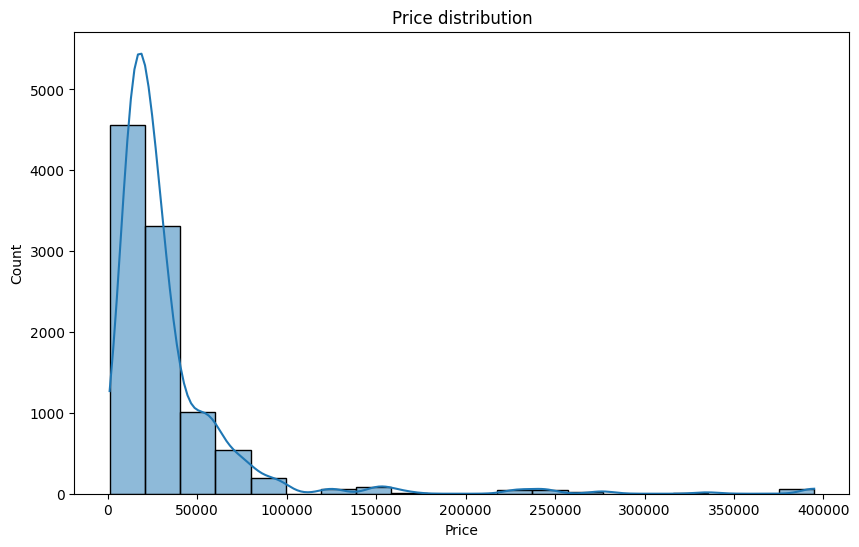

In [56]:
plt.figure(figsize = (10,6))
sns.histplot(df_new['Price'], bins=20, kde = True)
plt.title('Price distribution')
plt.show()

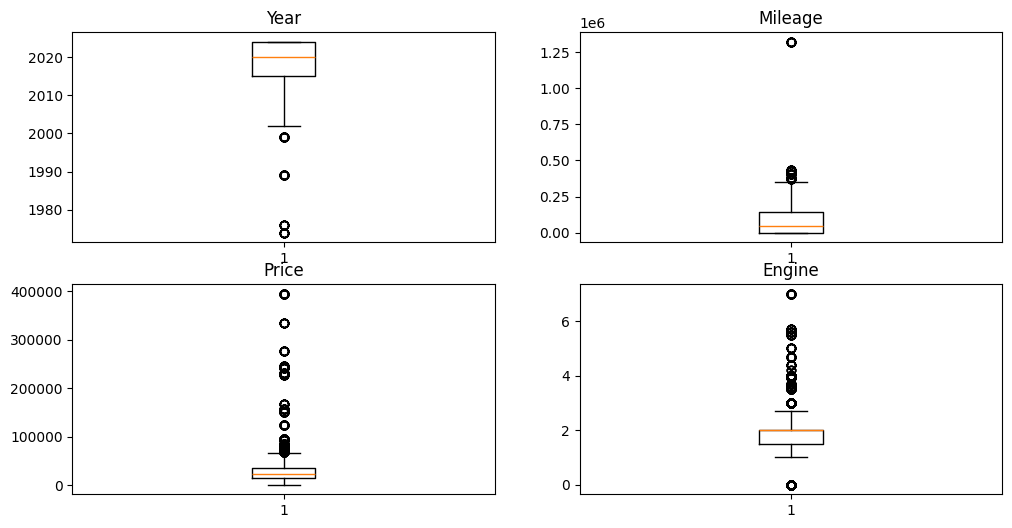

In [57]:
fig, axs = plt.subplots(2, 2, figsize = (12,6))
axs[0, 0].boxplot(df_new['Year'])
axs[1, 1].boxplot(df_new['Engine'])
axs[0, 1].boxplot(df_new['Mileage'])
axs[1, 0].boxplot(df_new['Price'])
axs[0, 0].set_title('Year')
axs[1, 1].set_title('Engine')
axs[0, 1].set_title('Mileage')
axs[1, 0].set_title('Price')
plt.show()

In [58]:
def clean_outliers(col):
    q1 = df_new[col].quantile(0.25)
    q3 = df_new[col].quantile(0.75)
    iqr = q3 - q1 
    outliers = df_new.loc[(df_new[col] < q1 - 1.5 * iqr) | (df_new[col] > q3 + 1.5 * iqr)]
    df_new_clean = df_new.loc[(df_new[col] > q1 - 1.5 * iqr) & (df_new[col] < q3 + 1.5 * iqr)]
    print(f'Outliers in {col}: {len(outliers)}')
    return df_new_clean

In [59]:
numeric_columns = df_new.select_dtypes(include='number').columns
numeric_columns

Index(['Year', 'Engine', 'Mileage', 'Price'], dtype='object')

In [60]:
for col in numeric_columns:
    cleaned_df = clean_outliers(col)    

Outliers in Year: 116
Outliers in Engine: 2065
Outliers in Mileage: 195
Outliers in Price: 897


In [61]:
cleaned_df.shape

(9063, 10)

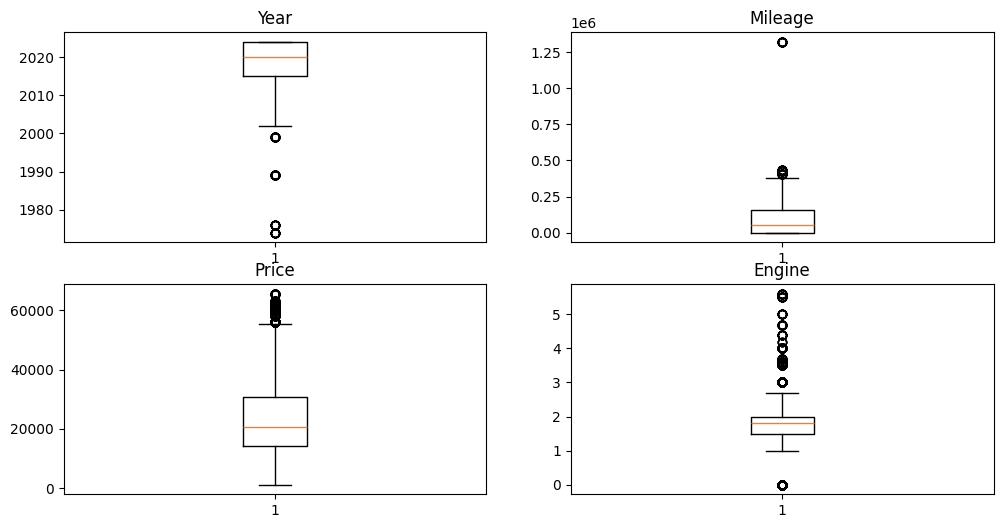

In [62]:
fig, axs = plt.subplots(2, 2, figsize = (12,6))
axs[0, 0].boxplot(cleaned_df['Year'])
axs[1, 1].boxplot(cleaned_df['Engine'])
axs[0, 1].boxplot(cleaned_df['Mileage'])
axs[1, 0].boxplot(cleaned_df['Price'])
axs[0, 0].set_title('Year')
axs[1, 1].set_title('Engine')
axs[0, 1].set_title('Mileage')
axs[1, 0].set_title('Price')
plt.show()

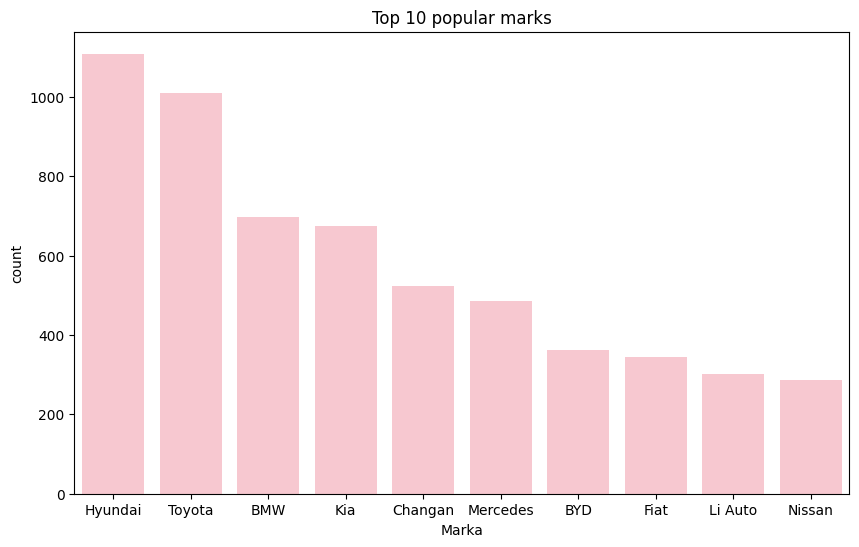

In [63]:
top_10 = cleaned_df['Marka'].value_counts()[:10]
plt.figure(figsize = (10,6))
sns.barplot(top_10, color = 'pink' )
plt.title('Top 10 popular marks')
plt.show()

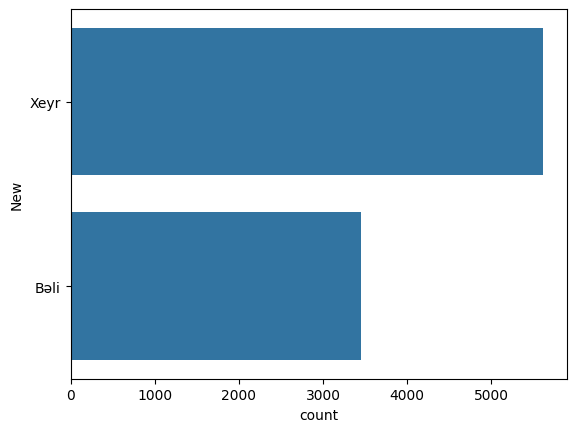

In [64]:
sns.countplot(cleaned_df['New'])
plt.show()

In [65]:
values = cleaned_df['Marka'].value_counts().reset_index()
marks = list(values.loc[values['count'] > 200,'Marka'])

In [66]:
cleaned_df = cleaned_df.loc[cleaned_df['Marka'].isin(marks)]
cleaned_df

,Marka,Model,Year,Color,Engine,Fuel_type,Mileage,Gear_box,New,Price
0,BMW,X5,2015,Göy,2.0,Plug-in Hibrid,121000,Avtomat,Xeyr,28000
3,Mercedes,C 230,1999,Qızılı,2.3,Benzin,284000,Avtomat,Xeyr,7345
5,BMW,530,2008,Qara,3.0,Benzin,291000,Avtomat,Xeyr,12685
6,Hyundai,Elantra,2020,Yaş Asfalt,2.0,Benzin,88514,Avtomat,Xeyr,16461
9,Land Rover,Range Rover,2015,Ağ,5.0,Benzin,45000,Avtomat,Xeyr,61900
...,...,...,...,...,...,...,...,...,...,...
9952,Li Auto,L9,2024,Qara,1.5,Plug-in Hibrid,0,Reduktor,Bəli,65500
9953,Mercedes,E 200,2019,Qara,2.0,Benzin,116000,Avtomat,Xeyr,38500
9954,Toyota,Aqua,2019,Ağ,1.5,Hibrid,28000,Variator,Xeyr,12744
9957,Toyota,Corolla,2014,Qara,1.6,Benzin,180000,Avtomat,Xeyr,14160


In [67]:
cleaned_df.to_csv('cleaned_df.csv')

In [68]:
from sklearn.preprocessing import OneHotEncoder

In [69]:
#Label encoding
import pickle
label_encoder = preprocessing.LabelEncoder() 
cleaned_df['New'] = label_encoder.fit_transform(cleaned_df['New']) 
with open("new.pkl", "wb") as f:
    pickle.dump(label_encoder, f)
cleaned_df['Gear_box'] = label_encoder.fit_transform(cleaned_df['Gear_box']) 
with open("gear_box.pkl", "wb") as f:
    pickle.dump(label_encoder, f)
cleaned_df['Fuel_type'] = label_encoder.fit_transform(cleaned_df['Fuel_type'])
with open("fuel_type.pkl", "wb") as f:
    pickle.dump(label_encoder, f)
cleaned_df['Color']= label_encoder.fit_transform(cleaned_df['Color']) 
with open("color.pkl", "wb") as f:
    pickle.dump(label_encoder, f)
#One-Hot encoding
encoder = OneHotEncoder(sparse_output=False)
encoder_df = encoder.fit_transform(cleaned_df.select_dtypes('object'))

In [70]:
encoder_df

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(6591, 102))

In [71]:
encoder_df = pd.DataFrame(encoder_df, columns = encoder.get_feature_names_out(), index=cleaned_df.index)

In [72]:
import pickle
with open("encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)

In [73]:
cleaned_df = pd.concat([cleaned_df.drop(['Marka','Model'], axis = 1).reset_index(drop = True), encoder_df.reset_index(drop = True)], axis = 1)

In [74]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6591 entries, 0 to 6590
Columns: 110 entries, Year to Model_ix35
dtypes: float64(103), int32(2), int64(5)
memory usage: 5.5 MB


In [75]:
cleaned_df

,Year,Color,Engine,Fuel_type,Mileage,Gear_box,New,Price,Marka_BMW,Marka_BYD,...,Model_Tipo,Model_Tucson,Model_Uni-K,Model_Vito 116,Model_X5,Model_X6,Model_X70C-DM,Model_X90 PLUS,Model_i30,Model_ix35
0,2015,4,2.0,3,121000,0,1,28000,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1999,9,2.3,0,284000,0,1,7345,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2008,7,3.0,0,291000,0,1,12685,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020,12,2.0,0,88514,0,1,16461,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015,1,5.0,0,45000,0,1,61900,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6586,2024,7,1.5,3,0,2,0,65500,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6587,2019,7,2.0,0,116000,0,1,38500,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6588,2019,1,1.5,2,28000,4,1,12744,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6589,2014,7,1.6,0,180000,0,1,14160,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Model

In [76]:
import numpy as np
import xgboost as xg 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error as MSE 

In [77]:
X = cleaned_df.drop('Price', axis = 1)
y = cleaned_df['Price']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 123) 
xgb_r = xg.XGBRegressor(objective ='reg:linear', n_estimators = 50, seed = 123)
xgb_r.fit(train_X, train_y) 
pred = xgb_r.predict(test_X) 
rmse = np.sqrt(MSE(test_y, pred)) 
print("RMSE : % f" %(rmse)) 

RMSE :  892.167706


In [78]:
from sklearn.metrics import r2_score
r2 = r2_score(test_y, pred)
r2

0.9944096803665161

Hyperparameter tuning

In [79]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV
X = cleaned_df.drop('Price', axis = 1)
y = cleaned_df['Price']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 123) 
parameters = {'n_estimators':[50, 100]}
xgb1 = XGBRegressor()
tuning = GridSearchCV(estimator = xgb1, param_grid = parameters, cv = 2, n_jobs = 5)
tuning.fit(train_X, train_y)
model = tuning.best_estimator_
pred_tuning = tuning.predict(test_X) 

In [80]:
score = tuning.score(test_X, test_y)
print(score)

0.9952263832092285


In [81]:
from sklearn.metrics import r2_score
r2_tuning = r2_score(test_y, pred_tuning)

In [82]:
r2_tuning

0.9952263832092285

In [83]:
rmse

np.float64(892.167705583517)

In [84]:
import pickle
with open("best_model.pkl", "wb") as f:
    pickle.dump(model, f)